# ITI105 Machine Learning Project

Team members:
* Lye Suh Jeng (7487427Y)
* Lee Li Neng (6203055B)
* Lim Chan Boon (9704541M)
---
Project Problem: 4 (a) as in suggested project:
* The success of the song can often been measured by whether the song is on the Hit Chart such as Billboard Hot 100. It is important for music labels to know what makes a song successful so that they can focus their budget on making songs that has the highest chance of being successful.
---
We want to solve the problem statement by using the follow steps:
1.   Load dataset
2.   Discover & visualize data to gain insights
3.   Prepare data
4.   Feature scaling
5.   Split data into train and test datasets
6.   Train, fine tune and evaluate models
7.   Compare performance of models
8. Deploy the model

# (1) Gather and Load dataset

In [1]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('https://raw.githubusercontent.com/dy018/project105/main/song_data.csv')

# (2) Discover & visualize data to gain insights

In [2]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
# Drop song_name since it's not feature to determine song popularity
df.drop(['song_name'], axis=1, inplace=True)

print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


* audio_mode, time_signature and key most likely are categorical features. The rest are numeric features

In [6]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = df.columns[1:].tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)


>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [7]:
# Study each columns in df
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


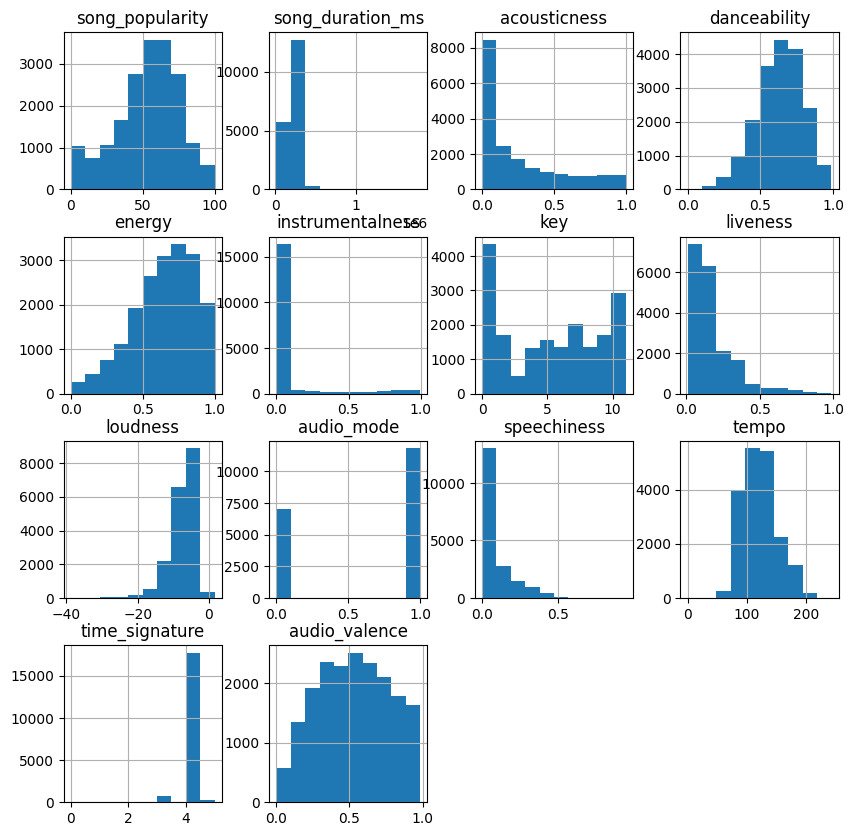

In [8]:
# Plot histograms for df to see data distribution

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


* Target = Song_popularity (Popularity score from 0 to 100 with 100 as the most popular song).
* Base on the histogram, the song_popularity is well spreaded bell curve from 0 to 100.

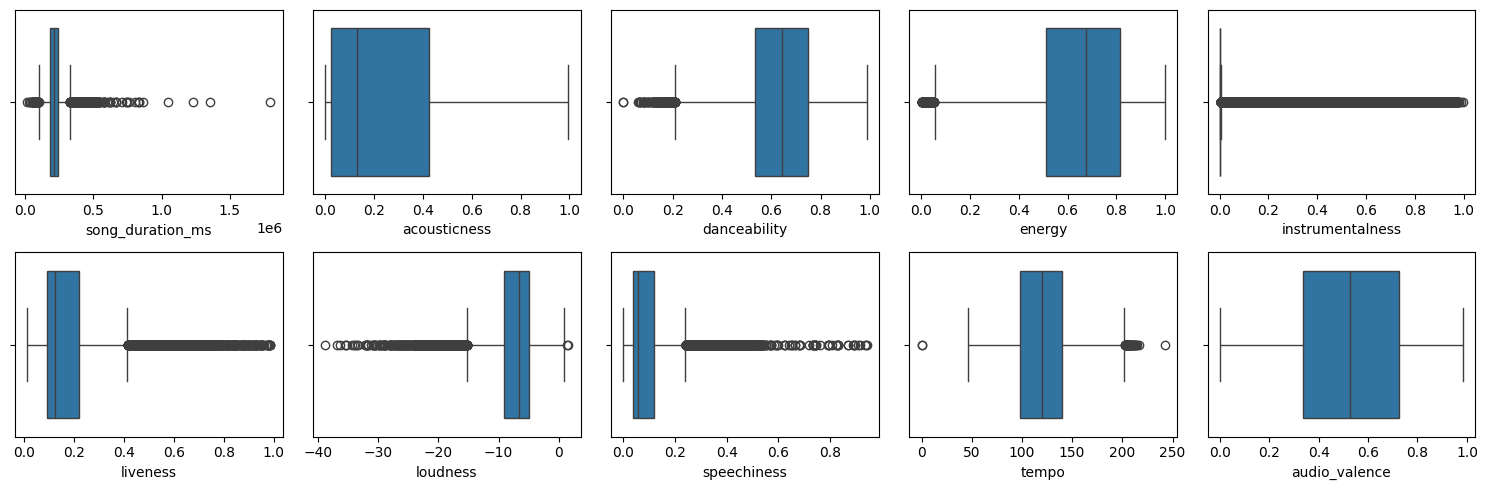

In [9]:
# Plot boxplot for numeric features
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axs[i // 5, i % 5])

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


* Observation from boxplots:
** song_duration_ms, danceability, energy, liveness, loudness and speechiness and tempo seem to have outliers

# (3) Prepare data


## (3)(a) Prepare data by removing any duplicat records if any


In [10]:
# Backup original df
df_original = df.copy()

In [11]:
# Remove duplicate rows (if any)

counter = 0
row,col = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(row,col):
    print('>>> The dataset doesn\'t have any duplicates')
else:
    print('>>> Number of duplicates dropped/fixed:', {row-df.shape[0]})
    print(">>> df's shape after removing dupliate rows", df.shape)

>>> Number of duplicates dropped/fixed: {3911}
>>> df's shape after removing dupliate rows (14924, 14)


## (3)(b) Convert categorical features to numeric using dummy encoding

In [12]:
# backup df:
df1 = df.copy()

# Convert categorical features to numeric using dummy encoding
for feature in category_features:
    dummies = pd.get_dummies(df1[feature], prefix=feature)
    df1 = pd.concat([df, dummies], axis=1)
    df1.drop(feature, axis=1, inplace=True)

print(">>> df's shape after converting categorical features to numeric using dummy encoding:\n", df1.shape)
print(">>> Columns in new df:\n", df1.columns)
print(">>> First 5 records in new df:\n", df1.head())

>>> df's shape after converting categorical features to numeric using dummy encoding:
 (14924, 25)
>>> Columns in new df:
 Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')
>>> First 5 records in new df:
    song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  l

In [13]:
# backup df
df2 = df1.copy()

# 4) Feature scaling

In [14]:
Y = df2['song_popularity']

In [15]:
# Apply scaling on columns of df
def scaler(temp_df):
  # Initialize the MinMaxScaler
  min_max_scaler = MinMaxScaler()

  # Fit the scaler to the data and transform it
  min_max_scaled_data = min_max_scaler.fit_transform(temp_df)

  temp_df = pd.DataFrame(min_max_scaled_data, columns=temp_df.columns)
  return temp_df

X_scaled = scaler(df2.drop(['song_popularity'], axis=1))

print (">>> Display first 5 records of training data after scaling:\n")
X_scaled.head()

>>> Display first 5 records of training data after scaling:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.140059,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,1.0,0.031243,0.689425,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.114658,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.0,0.052922,0.434371,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122938,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,1.0,0.084166,0.511233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.114658,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,1.0,0.113709,0.505303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.118514,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,1.0,0.033262,0.709856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5) Split data into train and test datasets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, test_size=0.2, random_state=40)
X_train.reset_index(drop=True,inplace=True)

print(">>> Size of trainig set: ", X_train.shape)
print(">>> Size of testing set: ", X_test.shape)

>>> Size of trainig set:  (11939, 24)
>>> Size of testing set:  (2985, 24)


In [17]:
print (">>> Display df's statistic after scaling:\n")
X_train.describe()

>>> Display df's statistic after scaling:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,...,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000
mean,0.115831,0.270072,0.631972,0.641350,0.092403,0.173814,0.770705,0.631544,0.106329,0.500682,...,0.094983,0.028897,0.073540,0.085267,0.069436,0.110227,0.069185,0.095904,0.070023,0.083592
std,0.035172,0.298921,0.160492,0.222708,0.241724,0.148430,0.100030,0.482406,0.110656,0.120173,...,0.293203,0.167524,0.261033,0.279290,0.254205,0.313186,0.253779,0.294472,0.255196,0.276786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096232,0.023794,0.529889,0.495957,0.000000,0.084094,0.728161,0.000000,0.039745,0.405490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.111674,0.137549,0.644377,0.673324,0.000020,0.113937,0.794117,1.000000,0.057705,0.495353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.130206,0.454317,0.748734,0.820629,0.004845,0.219567,0.837410,1.000000,0.121148,0.577625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.891865,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6.  Train, fine tune, and evaluate model's performance

## Model Evaluation Functions

In [18]:
# calculates r2_score
def cal_r2(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return r2

# Calculates adjusted_r2
def cal_adj_r2(x_df, r2):
  number_variables = x_df[1] - 1
  adjusted_r2 = 1 - ((1-r2) * (x_df[0]-1)) / (x_df[0] - number_variables -1)
  return adjusted_r2

def cal_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

def cal_performance(x_train_shape, x_test_shape, y_train, y_train_pred, y_test, y_test_pred):
  r2_train = cal_r2(y_train, y_train_pred)
  r2_test = cal_r2(y_test, y_test_pred)
  adj_r2_train = cal_adj_r2(x_train_shape, r2_train)
  adj_r2_test = cal_adj_r2(x_test_shape, r2_test)
  mse_train = cal_mse(y_train, y_train_pred)
  mse_test = cal_mse(y_test, y_test_pred)

  performance_dict = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'adj_r2_train': adj_r2_train,
    'adj_r2_test': adj_r2_test,
    'mse_train': mse_train,
    'mse_test': mse_test
    }
  return performance_dict

## 6a) Polynomial Regression (PR)

In [19]:

# specify degree of 3 for polynomial regression model
# include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_train_features = poly.fit_transform(X_train)
poly_test_features = poly.fit_transform(X_test)

# Create LinearRegression
pr = LinearRegression()

# train the model
pr.fit(poly_train_features, y_train)

pr_pred_train = pr.predict(poly_train_features)
pr_pred_test = pr.predict(poly_test_features)

In [20]:
pr_performance = cal_performance(X_train.shape, X_test.shape, y_train, pr_pred_train, y_test, pr_pred_test)
print(pr_performance)

{'r2_train': 0.07528578251294737, 'r2_test': 0.030007293859846906, 'adj_r2_train': 0.07350076975573361, 'adj_r2_test': 0.02247273383241577, 'mse_train': 386.8779827764426, 'mse_test': 390.98640321218267}


## 6b) Multiple Linear Regression (mlr)

In [21]:
mlr = LinearRegression()
mlr_param = {'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [1,5,10,15,None], 'positive': [True, False]}

random_search = RandomizedSearchCV(mlr, mlr_param, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

# Train the Elastic Net model with the best parameters
best_mlr = random_search.best_estimator_
best_mlr.fit(X_train, y_train)

# Predict on the test set
mlr_pred_train = best_mlr.predict(X_train)
mlr_pred_test = best_mlr.predict(X_test)

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
Best Score: 0.023453926418660242


In [22]:
# Evalute performance
mlr_performance = cal_performance(X_train.shape, X_test.shape, y_train, mlr_pred_train, y_test, mlr_pred_test)
print(mlr_performance)

{'r2_train': 0.027412584987864252, 'r2_test': 0.011521694487629075, 'adj_r2_train': 0.0255351606869596, 'adj_r2_test': 0.003843544866965587, 'mse_train': 406.9069665828062, 'mse_test': 398.43761182850864}


## 6c) Elastic Net Regression (enr)

In [23]:
# Create an ElasticNet regression model instance
# l1_ratio corresponds to the mix of L1 and L2 regularization
# alpha corresponds to the strength of the regularization
enr = ElasticNet()

# Define the hyperparameters grid to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(enr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the Elastic Net model with the best parameters
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train, y_train)

# Predict on the test set
enr_pred_train = best_elastic_net.predict(X_train)
enr_pred_test = best_elastic_net.predict(X_test)

Best parameters found:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 100}
Best cross-validation score (negative MSE):  -411.4201477577528


In [24]:
# Evaluate the model
enr_performance = cal_performance(X_train.shape, X_test.shape, y_train, enr_pred_train, y_test, enr_pred_test)
print(enr_performance)

{'r2_train': 0.017762491366399513, 'r2_test': 0.012096578168533823, 'adj_r2_train': 0.015866439104664454, 'adj_r2_test': 0.0044228940408324036, 'mse_train': 410.94433151488414, 'mse_test': 398.205886681258}


## 6d) Decision Tree Regressor (dtr)

In [25]:
# Create a Decision Tree Regressor object
dtr = DecisionTreeRegressor(random_state=40)

# Fit the regressor to the training data
dtr.fit(X_train, y_train)

# Predict on the test data
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)



In [26]:
# Evaluate the model
dtr_performance = cal_performance(X_train.shape, X_test.shape, y_train, dtr_pred_train, y_test, dtr_pred_test)
print(dtr_performance)

{'r2_train': 0.9857570556409142, 'r2_test': -0.9206469038575462, 'adj_r2_train': 0.985729561917015, 'adj_r2_test': -0.9355658092235453, 'mse_train': 5.95890219728062, 'mse_test': 774.1778056951424}


## 6e) Adaboost (ada)

In [27]:
# Define the AdaBoost Regressor model
adaboost = AdaBoostRegressor() # base estimator is DecisionTreeRegressor

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 1, 0.2, 0.5, 0.7, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_adaboost = grid_search.best_estimator_
best_adaboost.fit(X_train, y_train)

# Predict on the test data
ada_pred_train = best_adaboost.predict(X_train)
ada_pred_test = best_adaboost.predict(X_test)

Best parameters found:  {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}
Best cross-validation score (negative MSE):  -401.912853456541


In [28]:
# Evaluate the model
ada_performance = cal_performance(X_train.shape, X_test.shape, y_train, ada_pred_train, y_test, ada_pred_test)
print(ada_performance)

{'r2_train': 0.04672479009082353, 'r2_test': 0.03903292589584639, 'adj_r2_train': 0.04488464491013444, 'adj_r2_test': 0.03156847378358851, 'mse_train': 398.82720873772644, 'mse_test': 387.34833523070836}


## 6f) Gradient Boosting Regressor (gbr)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 1, 0.2, 0.5, 0.7, 1.0],
    'max_depth': [3,5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(gbr, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)


# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score (negative MSE): ", random_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_gbr = random_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Predict on the test data
gbr_pred_train = best_gbr.predict(X_train)
gbr_pred_test = best_gbr.predict(X_test)


Best parameters found:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Best cross-validation score (negative MSE):  -396.3624855204565


In [30]:
# Evaluate the model
gbr_performance = cal_performance(X_train.shape, X_test.shape, y_train, gbr_pred_train, y_test, gbr_pred_test)
print(gbr_performance)

{'r2_train': 0.12692624782402195, 'r2_test': 0.048035057689652105, 'adj_r2_train': 0.12524091871784926, 'adj_r2_test': 0.04064053095100362, 'mse_train': 365.2728655722561, 'mse_test': 383.719739769091}


## 6g) RBF SVC (RBF)

In [31]:
# Define the SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-2, 1e-1, 1]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the SVR model with the best parameters
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# Predict on the test set
rbf_pred_train = best_svr.predict(X_train)
rbf_pred_test = best_svr.predict(X_test)

Best parameters found:  {'C': 100, 'gamma': 0.1}
Best cross-validation score (negative MSE):  -410.28545288084035


In [32]:
# Evaluate the model
rbf_performance = cal_performance(X_train.shape, X_test.shape, y_train, rbf_pred_train, y_test, rbf_pred_test)
print(rbf_performance)

{'r2_train': 0.04553909388709654, 'r2_test': 0.00437313967323949, 'adj_r2_train': 0.04369665990970695, 'adj_r2_test': -0.003360537391102092, 'mse_train': 399.32327524866446, 'mse_test': 401.31906415010934}


Observation from comparison table above:
* DTR has best performance as it got high r2

## 6h) Perform stacking on base models (STA)

In [33]:
# Define the base estimators
#base_estimators = [pr, best_mlr, best_elastic_net, best_adaboost, best_gbr, best_svr]

base_estimators = [
    ('pr', pr),
    ('enr', best_elastic_net),
    ('ada', best_adaboost),
    ('gbr', best_gbr),
    ('rbf',best_svr)
]

# Create the Stacking Regressor with a Linear Regression meta-regressor
stacking_regressor = StackingRegressor(
    estimators=base_estimators,
    cv=5
)

# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Predict on the test data
stack_pred_train = stacking_regressor.predict(X_train)
stack_pred_test = stacking_regressor.predict(X_test)

In [34]:
# Evaluate the model
stacking_performance = cal_performance(X_train.shape, X_test.shape, y_train, stack_pred_train, y_test, stack_pred_test)
print(stacking_performance)

{'r2_train': 0.1171577364207147, 'r2_test': 0.04979790821291552, 'adj_r2_train': 0.11545355076714159, 'adj_r2_test': 0.04241707467319822, 'mse_train': 369.3597736298724, 'mse_test': 383.0091668120693}


## Compare performance

In [35]:
# convert dictionary to dataframe
pr_df  = pd.DataFrame.from_dict(pr_performance, orient='index', columns=['PR'])
mlr_df = pd.DataFrame.from_dict(mlr_performance, orient='index', columns=['MLR'])
enr_df = pd.DataFrame.from_dict(enr_performance, orient='index', columns=['ENR'])
dtr_df = pd.DataFrame.from_dict(dtr_performance, orient='index', columns=['DTR'])
ada_df = pd.DataFrame.from_dict(ada_performance, orient='index', columns=['ADA'])
gbr_df = pd.DataFrame.from_dict(gbr_performance, orient='index', columns=['GBR'])
rbf_df = pd.DataFrame.from_dict(rbf_performance, orient='index', columns=['RBF'])
stack_df = pd.DataFrame.from_dict(stacking_performance, orient='index', columns=['STA'])

df_performance = pd.concat([pr_df, mlr_df, enr_df, dtr_df, ada_df, gbr_df, rbf_df, stack_df], axis=1)
print(">>> Comparision of model performance:\n")
df_performance

>>> Comparision of model performance:



,PR,MLR,ENR,DTR,ADA,GBR,RBF,STA
r2_train,0.075286,0.027413,0.017762,0.985757,0.046725,0.126926,0.045539,0.117158
r2_test,0.030007,0.011522,0.012097,-0.920647,0.039033,0.048035,0.004373,0.049798
adj_r2_train,0.073501,0.025535,0.015866,0.985730,0.044885,0.125241,0.043697,0.115454
adj_r2_test,0.022473,0.003844,0.004423,-0.935566,0.031568,0.040641,-0.003361,0.042417
mse_train,386.877983,406.906967,410.944332,5.958902,398.827209,365.272866,399.323275,369.359774
mse_test,390.986403,398.437612,398.205887,774.177806,387.348335,383.719740,401.319064,383.009167


### Validation

In [36]:
print(y_test[:10])
print(stack_pred_test[:10])

3807     58
8462     75
2564      4
10360    64
8319     49
3108     64
4904     58
17875    68
11993    41
85       95
Name: song_popularity, dtype: int64
[49.92880424 45.68964425 42.56071909 51.8505926  50.8409467  44.56804101
 44.39144534 51.86973017 54.49676333 54.27373999]
